In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from torch import optim
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision import models

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [ ]:
batch_size=64
train_loader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.network = nn.Sequential(
            nn.Conv2d(1,8,kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(8*14*14,10),
        )

    def forward(self,x ):
        return self.network(x)

In [ ]:
model = CNN()

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# train_losses = []
# train_accuracies = []
# test_losses = []
# test_accuracies = []

# epochs = 5
# for epoch in range(epochs):
#     model.train()
#     running_loss = 0.0
#     correct = 0
#     total = 0
    
#     for images, labels in train_loader:
#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
        
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()
#         running_loss += loss.item()
    
#     train_loss = running_loss / len(train_loader)
#     train_accuracy = 100 * correct / total
#     train_losses.append(train_loss)
#     train_accuracies.append(train_accuracy)
    
#     model.eval()
#     test_loss = 0.0
#     correct = 0
#     total = 0
    
#     with torch.no_grad():
#         for images, labels in test_loader:
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             test_loss += loss.item()
            
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
    
#     test_loss = test_loss / len(test_loader)
#     test_accuracy = 100 * correct / total
#     test_losses.append(test_loss)
#     test_accuracies.append(test_accuracy)
    
#     print(f"Epoch {epoch+1}/{epochs}")
#     print(f"  Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
#     print(f"  Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inps, labels = data
        optimizer.zero_grad()
        outputs = model(inps)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (i+1)% 100==0:
            print(f"[{epoch+1}, {i+1:5d}] loss: { running_loss/100:.3f}")
            running_loss = 0.0
print("Done Bro")

In [ ]:
class CNNPro(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),   
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),        

            nn.Conv2d(16, 32, kernel_size=3, padding=1),  
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),        

            nn.Flatten(),                                 
            nn.Linear(32 * 7 * 7, 10)                 
        )

    def forward(self, x):
        return self.network(x)
modelpro = CNNPro()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelpro.parameters(), lr=0.001)

In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inps, labels = data
        optimizer.zero_grad()
        outputs = modelpro(inps)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (i+1)% 100==0:
            print(f"[{epoch+1}, {i+1:5d}] loss: { running_loss/100:.3f}")
            running_loss = 0.0
print("Done Bro")

In [ ]:
class CNNPromax(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),   #16*28*28
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),        
            nn.Conv2d(16, 32, kernel_size=3, padding=1),  
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),        
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),  
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),   
            nn.Flatten(),                                 
            nn.Linear(128, 10)                 
        )

    def forward(self, x):
        return self.network(x)
modelpromax = CNNPromax()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelpromax.parameters(), lr=0.001)

In [ ]:
num_epochs = 100
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inps, labels = data
        optimizer.zero_grad()
        outputs = modelpromax(inps)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (i+1)% 100==0:
            print(f"[{epoch+1}, {i+1:5d}] loss: { running_loss/100:.3f}")
            running_loss = 0.0
print("Done Bro")

In [21]:
from torch.utils.data import random_split

train_transform = transforms.Compose([
    transforms.ToTensor()
])

test_transform = transforms.Compose([
transforms.ToTensor(),
])

train_dataset.transform = train_transform
test_dataset.transform = test_transform

m=len(train_dataset)

train_data, val_data = random_split(train_dataset, [int(m-m*0.2), int(m*0.2)])

batch_size=256

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)

valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

In [22]:
def add_noise(inputs,noise_factor=0.3):
     noisy = inputs+torch.randn_like(inputs) * noise_factor
     noisy = torch.clip(noisy,0.,1.)
     return noisy

In [23]:
latent_space_size= 8

class AutoEncoder(nn.Module):
  def __init__(self):
    super().__init__()

    self.encoder = nn.Sequential(
        nn.Conv2d(1,8,kernel_size=2,stride=1,padding='same'),
        nn.ReLU(),
        nn.Conv2d(8,16,kernel_size=2,stride=1,padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(16,24,kernel_size=2,stride=1,padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(24,32,kernel_size=3,stride=2,padding=0),
        nn.ReLU()
    )

    self.Flatten = nn.Flatten(start_dim=1)

    self.enc_lin = nn.Sequential(

        nn.Linear(3*3*32,128),
        nn.ReLU(),
        nn.Linear(128,latent_space_size)
    )

    self.dec_lin =nn.Sequential(
        nn.Linear(latent_space_size,128),
        nn.ReLU(),
        nn.Linear(128, 32*3*3),
        nn.ReLU(),
        nn.Unflatten(dim=1,unflattened_size =(32,3,3))
    )

    #self.pool = nn.MaxPool2d(kernel_size=2,padding=1)

    self.decoder = nn.Sequential(

        nn.ConvTranspose2d(32,24,kernel_size=3,stride=2),
        nn.ReLU(),
        nn.ConvTranspose2d(24,16,kernel_size=2,stride=2),
        nn.ReLU(),
        nn.ConvTranspose2d(16,8,kernel_size=2,stride=2),
        nn.ReLU(),
        nn.Conv2d(8,1,kernel_size=2,stride=1, padding='same'),
        nn.Sigmoid()

    )

  def forward(self,x):

    x = self.encoder(x)
    #print(x.shape)
    x=self.Flatten(x)
    #print(x.shape)
    x=self.enc_lin(x)
    #print(x.shape)
    x=self.dec_lin(x)

    #print(x.shape)
    x = self.decoder(x)
    #print(x.shape)


    return x

In [24]:
autoendcoder_model = AutoEncoder()
autoendcoder_model.to('mps')

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(2, 2), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1), padding=same)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(16, 24, kernel_size=(2, 2), stride=(1, 1), padding=same)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(24, 32, kernel_size=(3, 3), stride=(2, 2))
    (9): ReLU()
  )
  (Flatten): Flatten(start_dim=1, end_dim=-1)
  (enc_lin): Sequential(
    (0): Linear(in_features=288, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=8, bias=True)
  )
  (dec_lin): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=288, bias=True)
    (3): ReLU()
    (4): Unflatten(dim=1, unflattened_size=(32, 3, 3))
  )


In [25]:
def plot_ae_outputs_den(encoder,n=10,noise_factor=0.2):
    plt.figure(figsize=(16,4.5))
    targets = test_dataset.targets.numpy()
    t_idx = {i:np.where(targets==i)[0][0] for i in range(n)}
    for i in range(n):

      ax = plt.subplot(3,n,i+1)
      img = test_dataset[t_idx[i]][0].unsqueeze(0)
      image_noisy = add_noise(img,noise_factor)
      image_noisy = image_noisy.to('mps')

      encoder.eval()


      with torch.inference_mode():
         rec_img  = encoder(image_noisy)

      plt.imshow(img.cpu().squeeze().numpy(), cmap='gist_gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      if i == n//2:
        ax.set_title('Original images')
      ax = plt.subplot(3, n, i + 1 + n)
      plt.imshow(image_noisy.cpu().squeeze().numpy(), cmap='gist_gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      if i == n//2:
        ax.set_title('Corrupted images')

      ax = plt.subplot(3, n, i + 1 + n + n)
      plt.imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
      if i == n//2:
         ax.set_title('Reconstructed images')
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.7,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.3)
    plt.show()

In [31]:
import torch.optim as optim

def train_step(model,dataloader,loss_fn,optimizer,noise_factor,device='mps'):
  model.train()
  train_loss=[]

  for X,y in dataloader:
    noisy_X = add_noise(X,noise_factor)
    X = X.to(device)
    noisy_X = noisy_X.to(device)
    output = model(noisy_X)
    loss = loss_fn(output, X)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print(f'\t The batch loss is : {loss.data}')
    train_loss.append(loss.detach().cpu().numpy())

  return np.mean(train_loss)

In [32]:
def test_func(model,dataloader,loss_fn,noise_factor,device='mps'):
  model.eval()
  with torch.inference_mode():
    out=[]
    original=[]
    for X,_ in dataloader:
      noisy_X = add_noise(X,noise_factor)
      noisy_X = noisy_X.to(device)
      X = X.to(device)
      pred = model(noisy_X)

      out.append(pred)
      original.append(X)
    out = torch.cat(out)
    original = torch.cat(original)

    val_loss = loss_fn(out,original)
  return val_loss.data

  0%|          | 0/20 [00:00<?, ?it/s]


 training loss =  0.20664332807064056	 validation loss = 0.20656254887580872


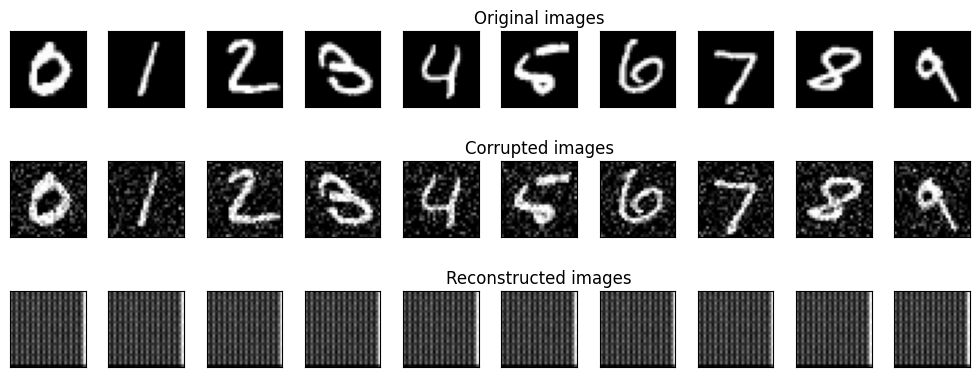

  5%|▌         | 1/20 [00:10<03:26, 10.89s/it]


 training loss =  0.20664332807064056	 validation loss = 0.2065625637769699


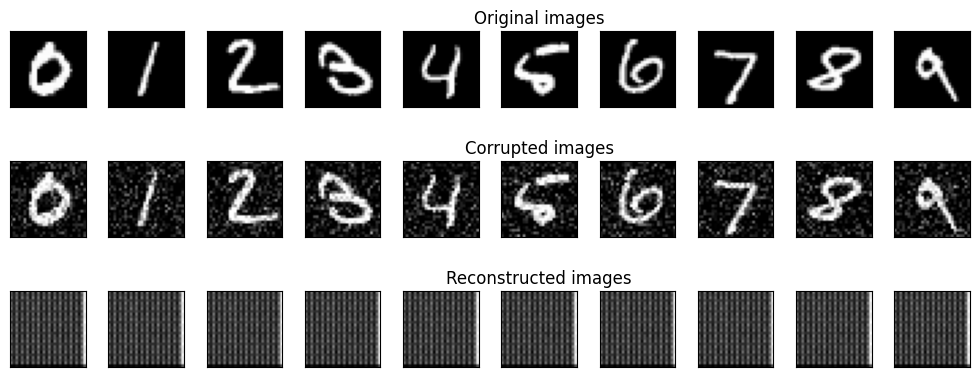

 10%|█         | 2/20 [00:17<02:31,  8.41s/it]


 training loss =  0.20664332807064056	 validation loss = 0.20656254887580872


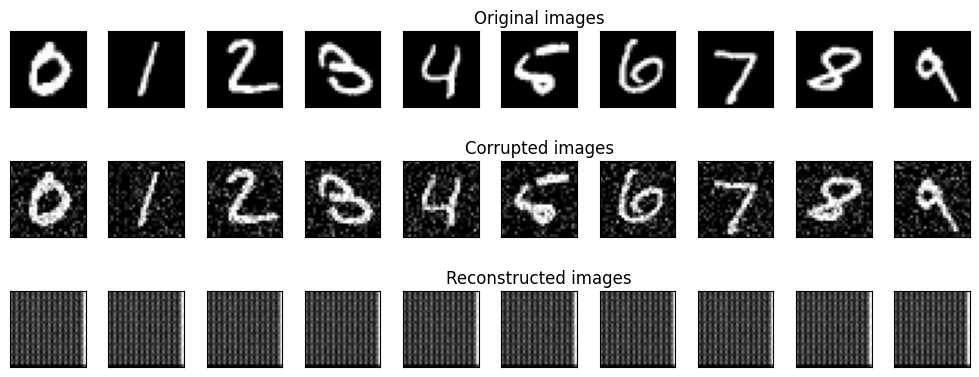

 15%|█▌        | 3/20 [00:24<02:09,  7.60s/it]

In [ ]:
from tqdm import tqdm
loss_func = nn.MSELoss()
history={'train_loss':[],'val_loss':[]}
for epoch in tqdm(range(20)):

  train_loss=train_step(model=autoendcoder_model,
             dataloader=train_loader,
             loss_fn=loss_func,
             optimizer=optimizer,
             noise_factor=0.2,
             device='mps')
  val_loss = test_func(model=autoendcoder_model,
                       dataloader=valid_loader,
                       loss_fn= loss_func,
                       noise_factor=0.2,
                       device='mps')
  history['train_loss'].append(train_loss)
  history['val_loss'].append(val_loss)
  print(f'\n training loss =  {train_loss}\t validation loss = {val_loss}')
  plot_ae_outputs_den(autoendcoder_model , n=10, noise_factor=0.2)